In [1]:
# pip install pandas

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [21]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 38.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 35.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
df = pd.read_csv('data.csv')

In [6]:
df.head(5)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
print(df.shape)

(2017, 17)


In [8]:
updated_df = df.drop('Unnamed: 0', axis= 1)
lables = updated_df.columns.tolist()
print(lables)

['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target', 'song_title', 'artist']


In [9]:
print(df.dtypes)

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object


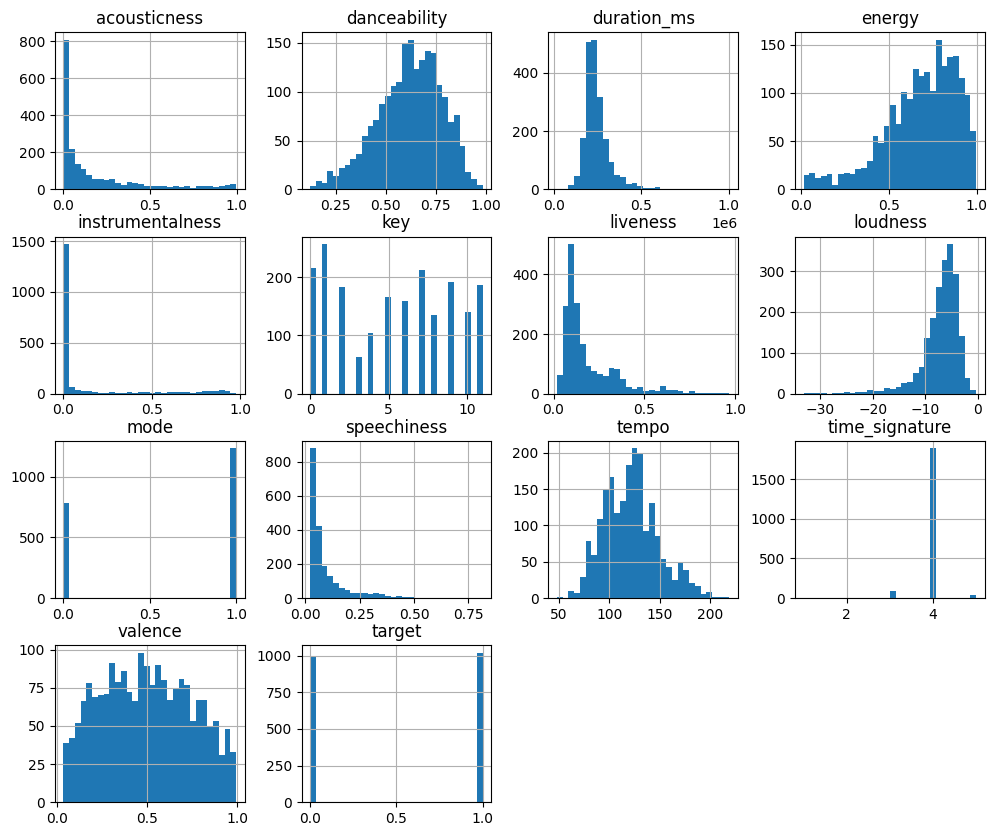

In [10]:
import matplotlib.pyplot as plt
updated_df.hist(bins=30, figsize=(12, 10))
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

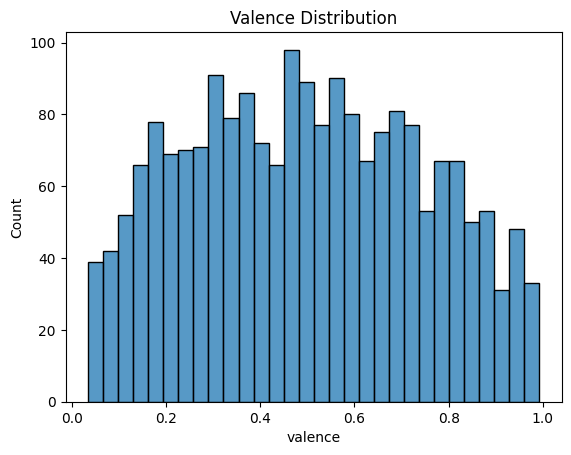

In [11]:
import seaborn as sns
sns.histplot(data=updated_df, x='valence', bins=30)
plt.title("Valence Distribution")
plt.show()

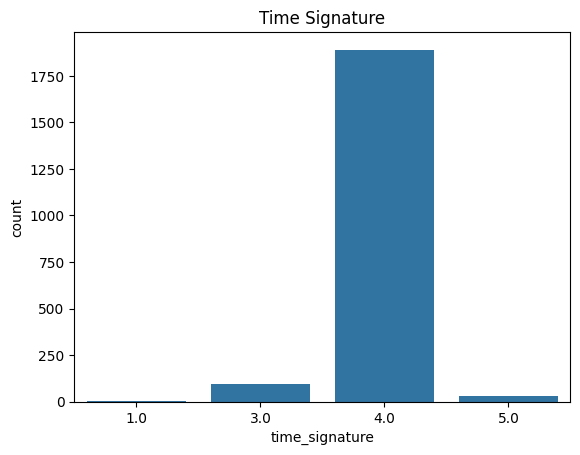

In [12]:
sns.countplot(data=updated_df, x='time_signature')
plt.title("Time Signature")
plt.show()

In [13]:
missing_counts = updated_df.isnull().sum()
print(missing_counts[missing_counts > 0])

Series([], dtype: int64)


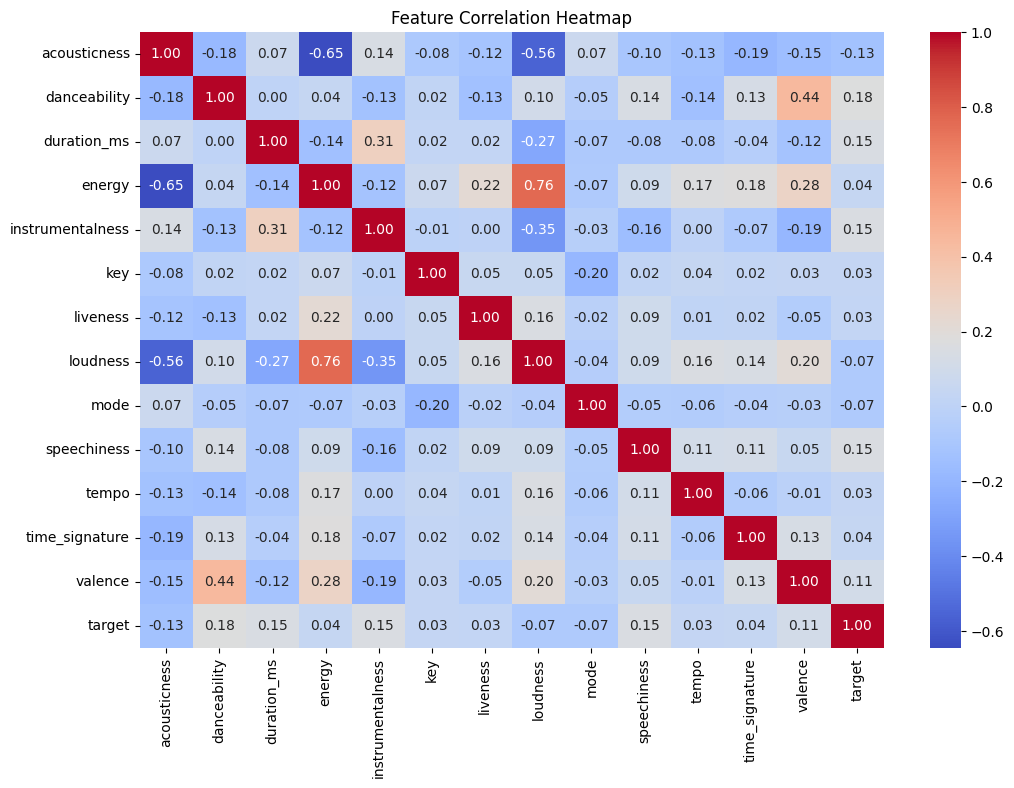

In [14]:
correlation_df = updated_df.drop(['song_title','artist'], axis= 1)
corr = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

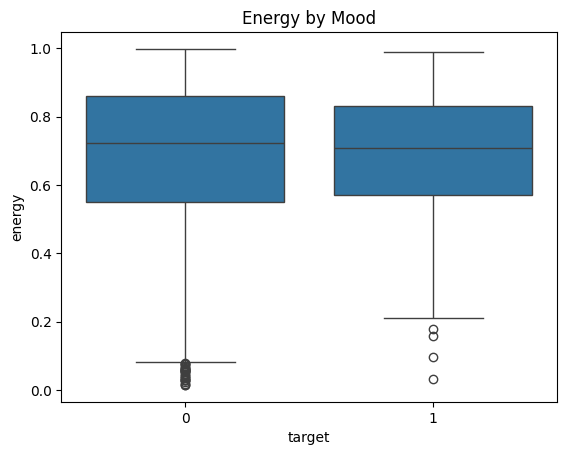

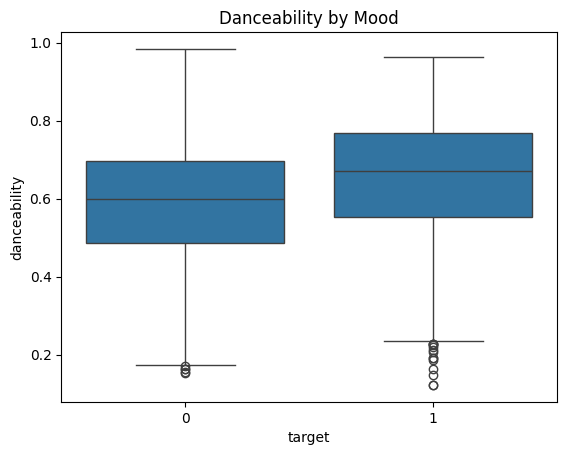

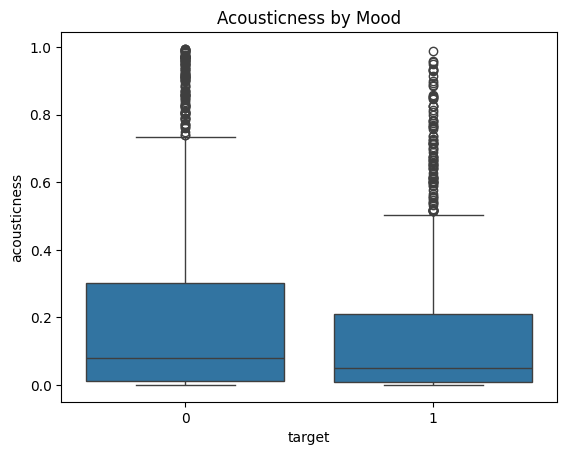

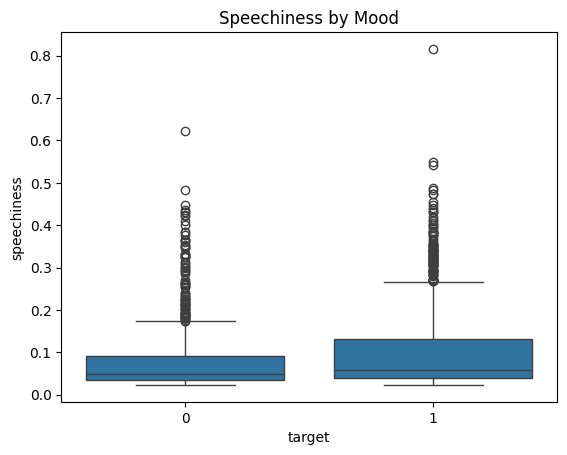

In [15]:
for feature in ['energy', 'danceability', 'acousticness', 'speechiness']:
    sns.boxplot(data=updated_df, x='target', y=feature)
    plt.title(f"{feature.capitalize()} by Mood")
    plt.show()

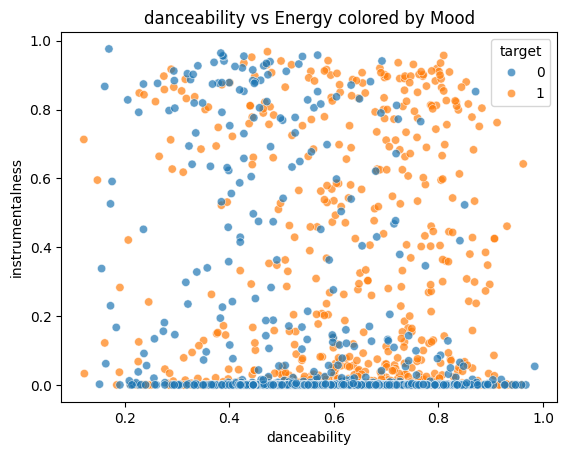

In [16]:
sns.scatterplot(data=updated_df, x='danceability', y='instrumentalness', hue='target', alpha=0.7)
plt.title("danceability vs Energy colored by Mood")
plt.show()

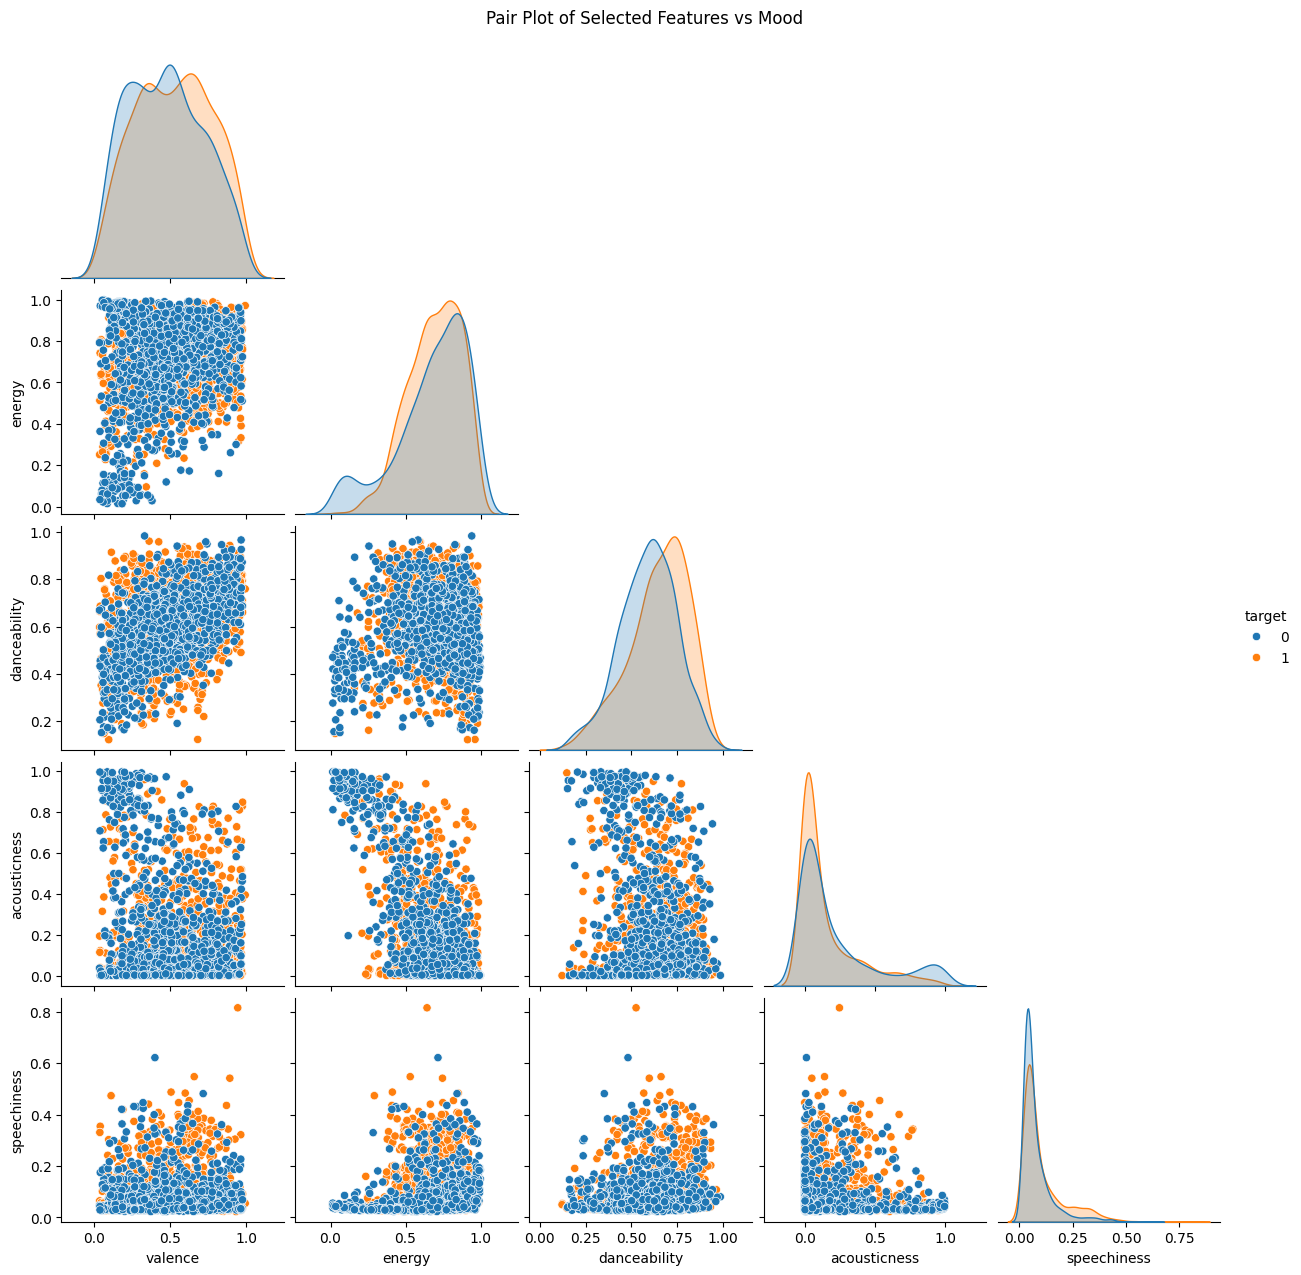

In [17]:
important_features = ['valence', 'energy', 'danceability', 'acousticness', 'speechiness', 'target']

sns.pairplot(updated_df[important_features], hue='target', diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Selected Features vs Mood", y=1.02)
plt.show()

In [18]:
updated_df = updated_df.dropna()

In [19]:
model_df = updated_df.drop(['song_title', 'artist'], axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler

X = model_df.drop('target', axis=1)
y = model_df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [24]:
from sklearn.linear_model import LogisticRegression

# 1. Create the logistic regression model
# 'solver=liblinear' is good for small datasets and binary classification
model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Fit the model to training data
model.fit(X_train, y_train)

# 3. Predict moods on the test set
y_pred = model.predict(X_test)  # 0 or 1 predictions
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (happy)

# 4. Look at the learned coefficients
print("Intercept (bias term):", model.intercept_)
print("Feature coefficients:")
for feature, weight in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {weight:.4f}")


Intercept (bias term): [0.04964686]
Feature coefficients:
acousticness: -0.4017
danceability: 0.3118
duration_ms: 0.1936
energy: 0.0972
instrumentalness: 0.3832
key: 0.0510
liveness: 0.0187
loudness: -0.3930
mode: -0.0862
speechiness: 0.3511
tempo: 0.0778
time_signature: -0.0280
valence: 0.1966


Accuracy: 0.6510


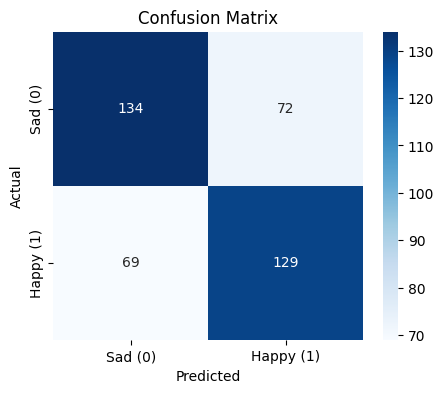


Classification Report:
              precision    recall  f1-score   support

         Sad       0.66      0.65      0.66       206
       Happy       0.64      0.65      0.65       198

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sad (0)', 'Happy (1)'], yticklabels=['Sad (0)', 'Happy (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 3. Precision, Recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Sad', 'Happy']))
